#**AI INVENTORY OPTIMIZER**

#CLASS: ITAI 2277
#Members: Milagros Pumasupa, Ahad Maredia, Larry Towett, Yasmin Bello

#1. PROJECT OVERVIEW

AI system for inventory optimization in convenience stores.
Predicts weekly product demand, recommends trending items, and generates actionable insights via a dashboard.
Aims to reduce overstock/understock, minimize waste, and improve profitability through data-driven decisions.


#2. DATA COLLECTION

In [12]:
from google.colab import files
import pandas as pd

# DATA COLLECTION
#Implement Manual Data Collection (a selector will open for you to choose)
uploaded = files.upload()

# DATA STORAGE AND ORGANIZATION
# Once uploaded, adjust the names
train_df = pd.read_csv("train.csv")
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")

# General review of each dataset
print("Train data:")
print(train_df.head())

print("\nFeatures data:")
print(features_df.head())

print("\nStores data:")
print(stores_df.head())


Saving features.csv to features (1).csv
Saving stores.csv to stores (1).csv
Saving train.csv to train (1).csv
Train data:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

Features data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358   

#2.1 Initial Raw Data Inspection - Walmart Datasets (train.csv, features.csv, stores.csv).


=== Train Dataset ===
Shape: (421570, 5)
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

Missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Data types:
 Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

Sample rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

=== Features Dataset ===
Shape: (8190, 12)
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']

Missing values:
 Store              0
Date               0
Temperature        0
Fuel_Price       

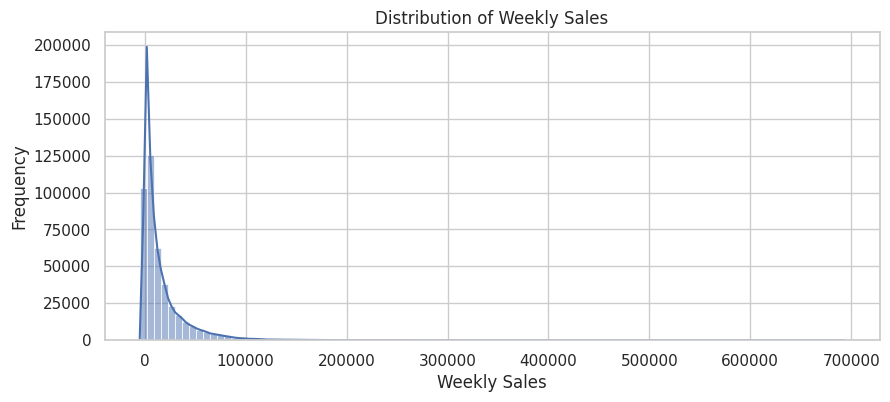

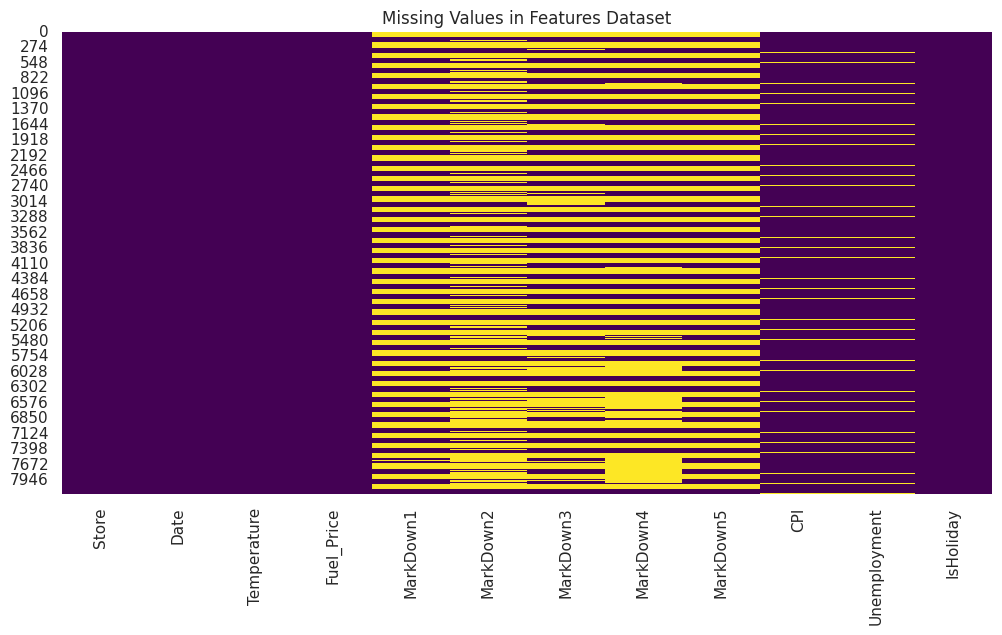

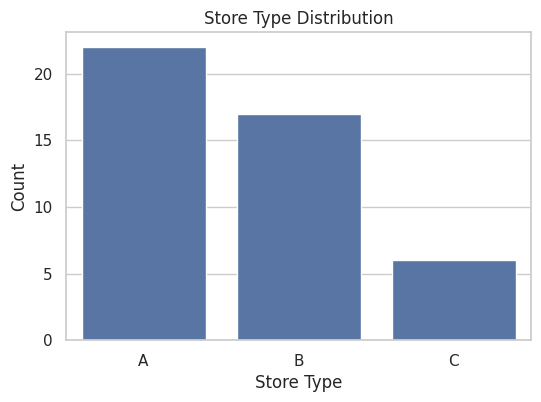

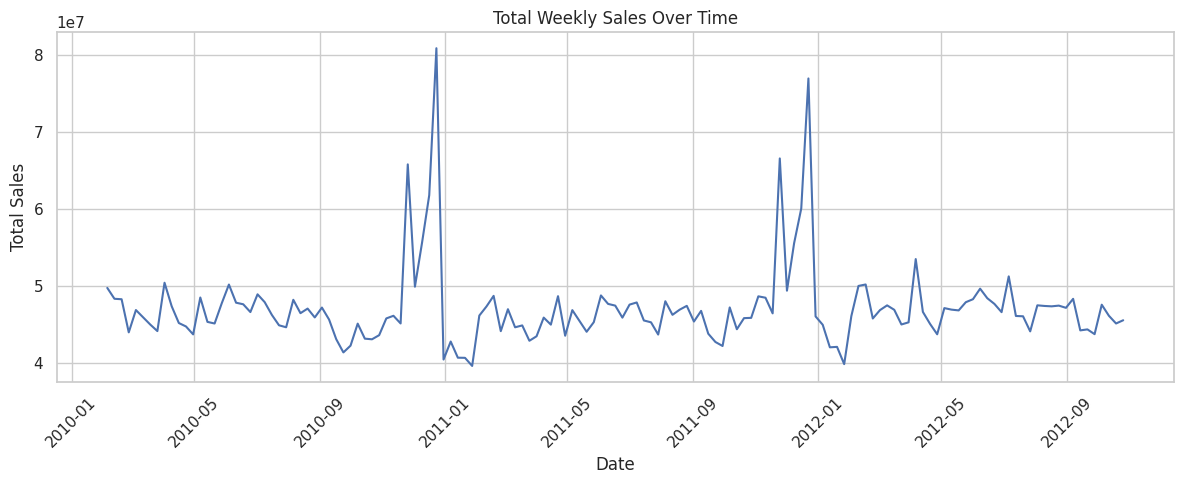

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load raw datasets
train_df = pd.read_csv("train.csv")
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")

# Set plot style
sns.set(style="whitegrid")

# Function to inspect each dataframe
def inspect_raw_data(name, df):
    print(f"\n=== {name} Dataset ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    print("\nSample rows:")
    print(df.head())

# Inspect all three datasets
inspect_raw_data("Train", train_df)
inspect_raw_data("Features", features_df)
inspect_raw_data("Stores", stores_df)

# Convert Date columns to datetime for analysis
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

# Visual 1: Distribution of Weekly Sales
plt.figure(figsize=(10, 4))
sns.histplot(train_df['Weekly_Sales'], bins=100, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

# Visual 2: Missing value heatmap for Features dataset
plt.figure(figsize=(12, 6))
sns.heatmap(features_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Features Dataset")
plt.show()

# Visual 3: Store Type distribution (from stores.csv)
plt.figure(figsize=(6, 4))
sns.countplot(data=stores_df, x='Type')
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

# Visual 4: Weekly sales trend (preview)
weekly_sales_trend = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_sales_trend, x='Date', y='Weekly_Sales')
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#3. DATA PREPROCESSING AND FEATURE ENGINEERING


/tmp/ipython-input-524752553.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'CPI', 'Unemployment', 'Fuel_Price', 'Temperature']].fillna(method='ffill')


Final dataset shape: (421570, 24)
Training set: (337256, 15)
Test set: (84314, 15)

Missing values per column:
 Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   Temperature     421570 non-null  float64       
 5   Fuel_Price      421570 non-null  float64       
 6   MarkDown1       421570 non-null  float64       
 7   MarkDown2       421570 non-null  float64       
 8   MarkDown3       421570 non-null  float64       
 9   MarkDown4       421570 non-null  float64       
 10  MarkDown5       421570 non-null  float64       
 11  CPI             421570 non-null  float64       
 12  Unemp

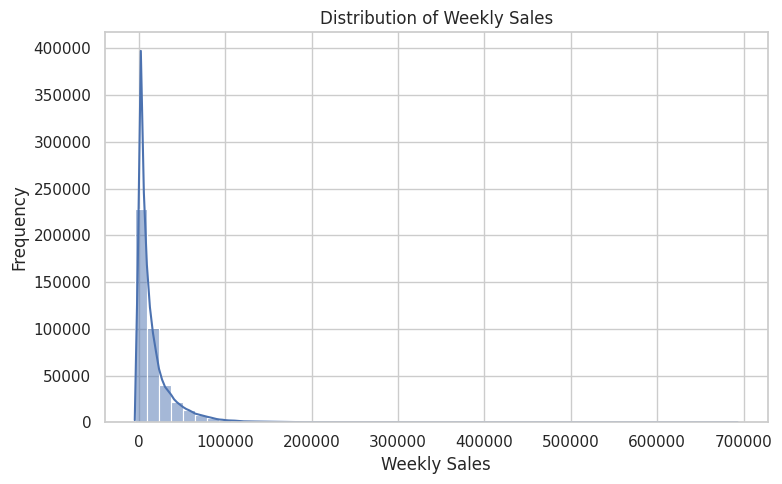

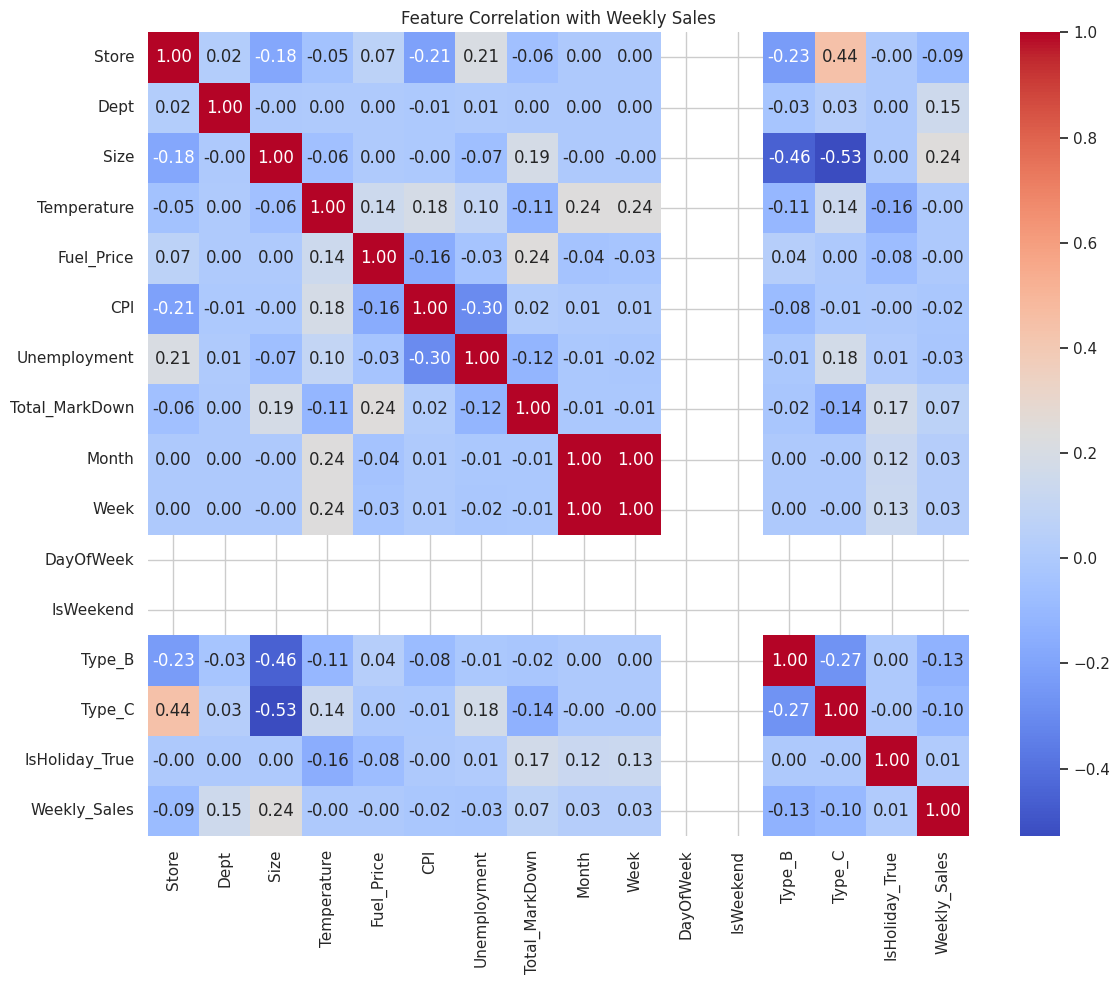

In [14]:
# DATA PREPROCESSING AND FEATURE ENGINEERING

# === IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# === LOAD CSV FILES ===
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')

# === CONVERT DATE COLUMNS TO DATETIME FORMAT ===
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

# === DATA CLEANING ===
# Fill missing values in MarkDown columns with 0 (assume no promotion)
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    if col in features_df.columns:
        features_df[col] = features_df[col].fillna(0)

# Fill other missing numerical values (CPI, Unemployment, etc.) using forward fill
features_df[['CPI', 'Unemployment', 'Fuel_Price', 'Temperature']] = features_df[[
    'CPI', 'Unemployment', 'Fuel_Price', 'Temperature']].fillna(method='ffill')

# === MERGE DATASETS ===
# Merge train and features on Store, Date, IsHoliday
merged = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with store information
merged = pd.merge(merged, stores_df, on='Store', how='left')

# === FEATURE ENGINEERING ===
# Extract year, month, week from the date
merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Week'] = merged['Date'].dt.isocalendar().week

# Extract more date-related features
merged['Day'] = merged['Date'].dt.day
merged['DayOfWeek'] = merged['Date'].dt.dayofweek  # Monday=0, Sunday=6
merged['IsWeekend'] = merged['DayOfWeek'].isin([5, 6]).astype(int)

# Create new feature: total markdown
merged['Total_MarkDown'] = (merged['MarkDown1'] + merged['MarkDown2'] +
                            merged['MarkDown3'] + merged['MarkDown4'] + merged['MarkDown5'])

# === ENCODE CATEGORICAL VARIABLES ===
# One-hot encoding
merged = pd.get_dummies(merged, columns=['Type', 'IsHoliday'], drop_first=True)

# === NORMALIZE NUMERIC FEATURES ===
scaler = MinMaxScaler()
merged[['CPI', 'Unemployment', 'Fuel_Price', 'Temperature']] = scaler.fit_transform(
    merged[['CPI', 'Unemployment', 'Fuel_Price', 'Temperature']]
)

# === DEFINE FEATURES AND TARGET ===
features = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'Total_MarkDown', 'Month', 'Week', 'DayOfWeek', 'IsWeekend',
            'Type_B', 'Type_C', 'IsHoliday_True']  # Include one-hot columns

X = merged[features]
y = merged['Weekly_Sales']

# === SPLIT DATA INTO TRAINING AND TEST SETS ===
# Important: shuffle=False to maintain time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === OUTPUT SHAPES FOR VERIFICATION ===
print("Final dataset shape:", merged.shape)
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

# === DATASET VERIFICATION ===
print("\nMissing values per column:\n", merged.isnull().sum()[merged.isnull().sum() > 0])
merged.info()
print(merged.describe())
print(merged.head())

# === SAVE FINAL PREPROCESSED DATA ===
merged.to_csv('walmart_preprocessed.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# === OPTIONAL: VISUALIZATION ===
# Histogram of weekly sales
plt.figure(figsize=(8, 5))
sns.histplot(merged['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(merged[features + ['Weekly_Sales']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation with Weekly Sales')
plt.tight_layout()
plt.show()

#3.1 Final Modeling Dataset Summary

The dataset walmart_preprocessed.csv is the cleaned and engineered version of Walmart’s historical sales data, ready for machine learning. It integrates weekly sales records with store-level metadata and economic indicators, and includes derived features such as Total_MarkDown, Month, and Week. All missing values have been handled, continuous variables normalized, and categorical features encoded. The dataset is structured to support supervised regression tasks and provides a solid foundation for accurate demand forecasting and sales prediction models.

In [15]:
# Load the preprocessed dataset
df = pd.read_csv('walmart_preprocessed.csv')

# Display basic dataset structure and statistics
print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nData types and non-null counts:")
print(df.info())

print("\nDescriptive statistics (numerical columns):")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nUnique values per column:")
print(df.nunique())

print("\nValue counts for store types (using one-hot encoded columns):")
print("Type B count:", df['Type_B'].sum())
print("Type C count:", df['Type_C'].sum())

Dataset shape (rows, columns): (421570, 24)

First 5 rows of the dataset:
   Store  Dept        Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
0      1     1  2010-02-05      24924.50     0.434149    0.050100        0.0   
1      1     1  2010-02-12      46039.49     0.396967    0.038076        0.0   
2      1     1  2010-02-19      41595.55     0.410861    0.021042        0.0   
3      1     1  2010-02-26      19403.54     0.476419    0.044589        0.0   
4      1     1  2010-03-05      21827.90     0.475147    0.076653        0.0   

   MarkDown2  MarkDown3  MarkDown4  ...  Year  Month  Week  Day  DayOfWeek  \
0        0.0        0.0        0.0  ...  2010      2     5    5          4   
1        0.0        0.0        0.0  ...  2010      2     6   12          4   
2        0.0        0.0        0.0  ...  2010      2     7   19          4   
3        0.0        0.0        0.0  ...  2010      2     8   26          4   
4        0.0        0.0        0.0  ...  2010      3   

#4.EXPLORATORY DATA ANALYSIS (EDA)

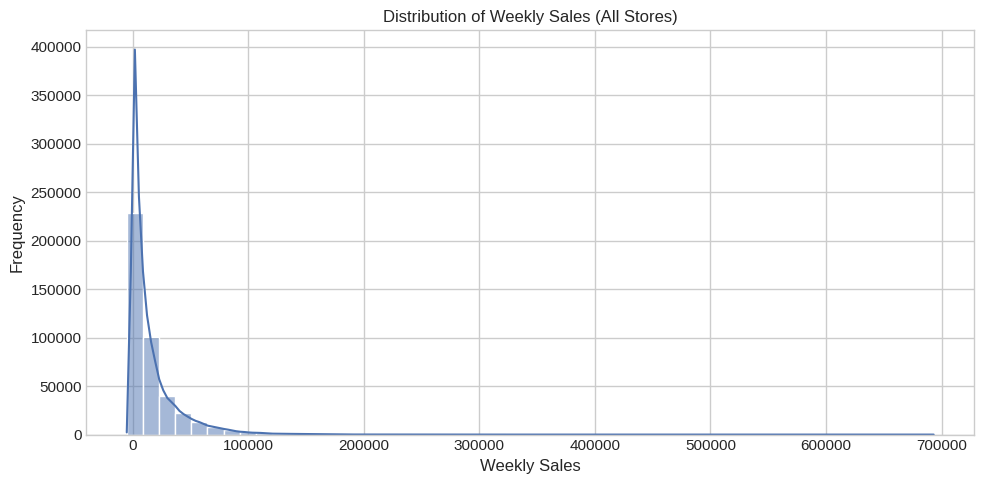

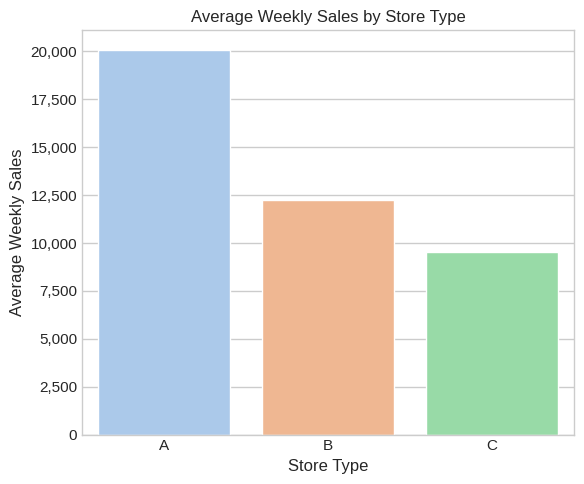

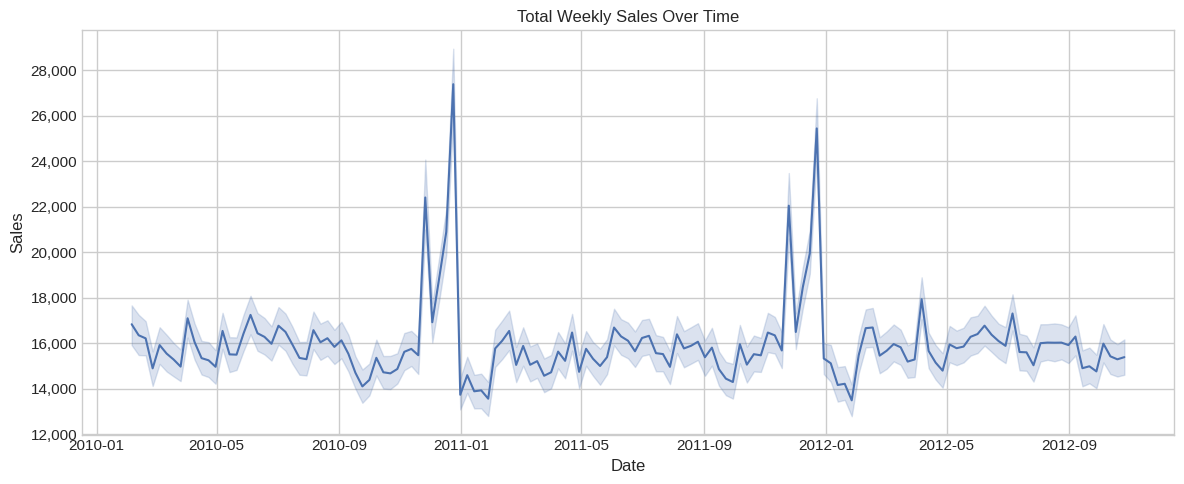

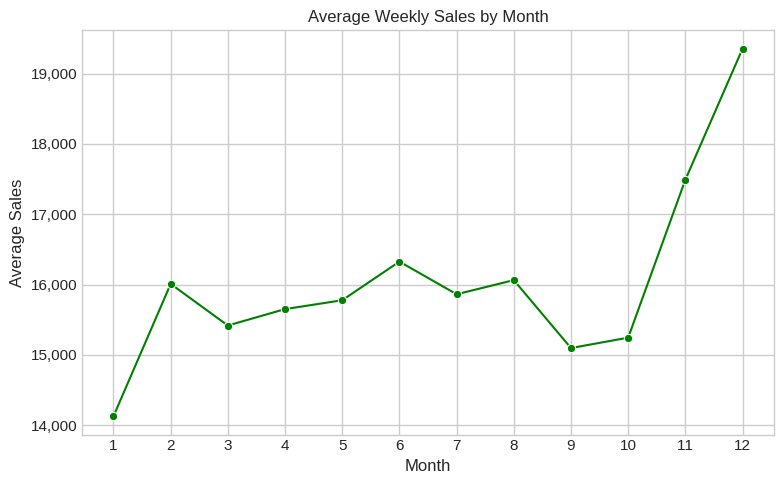

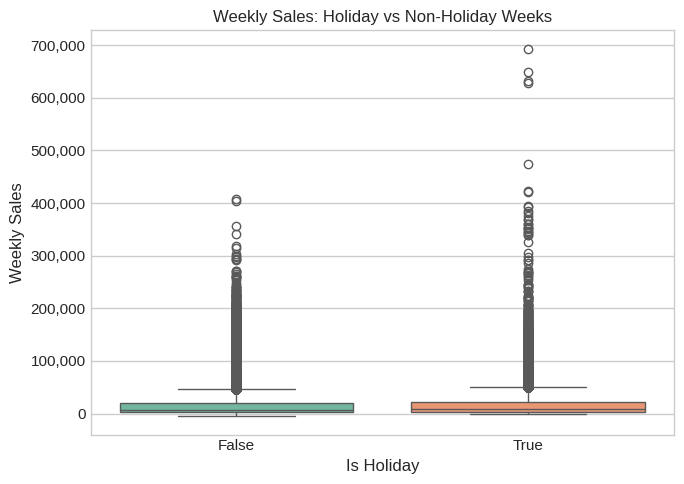

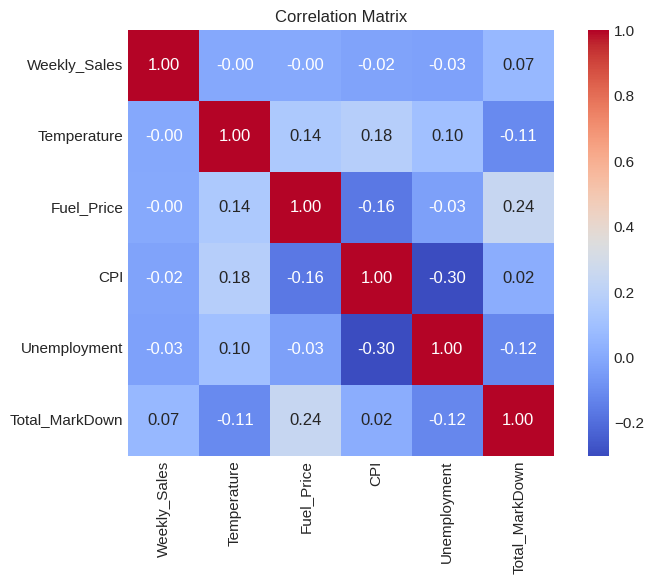

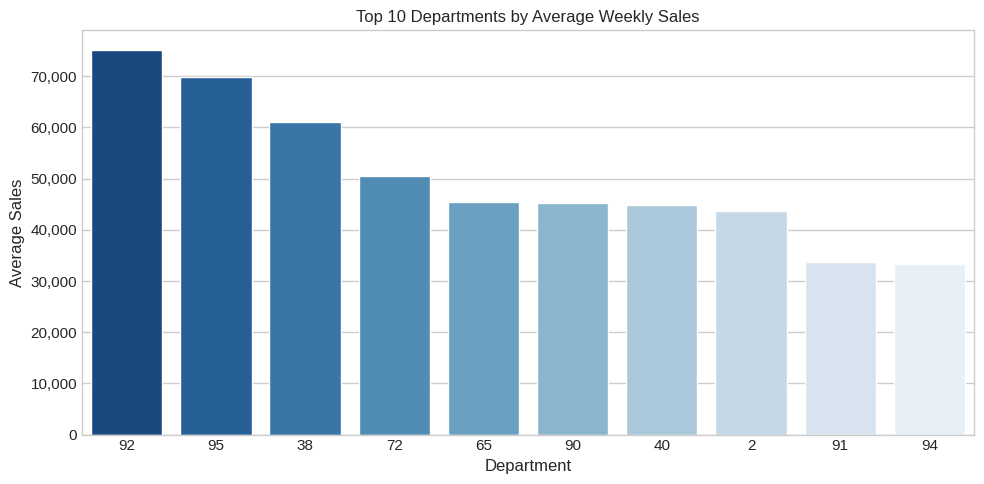

/tmp/ipython-input-1852039021.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette='viridis')


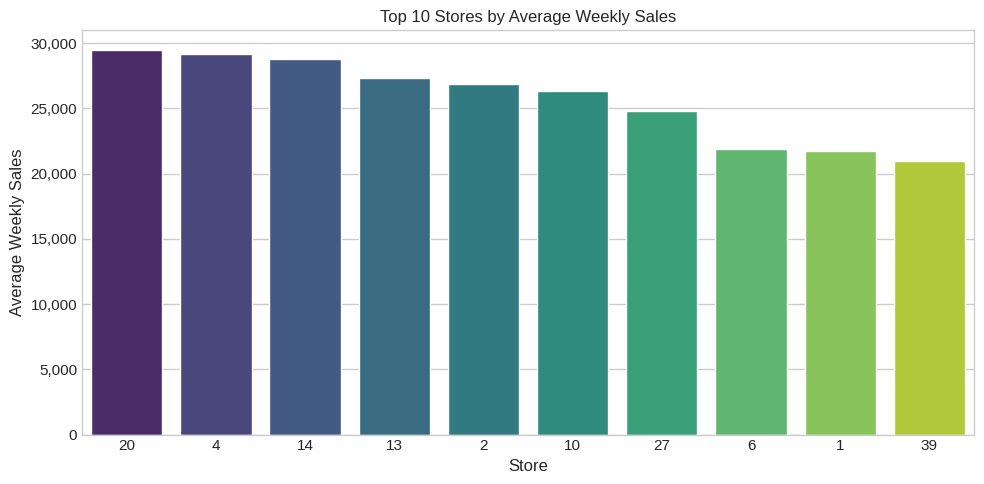

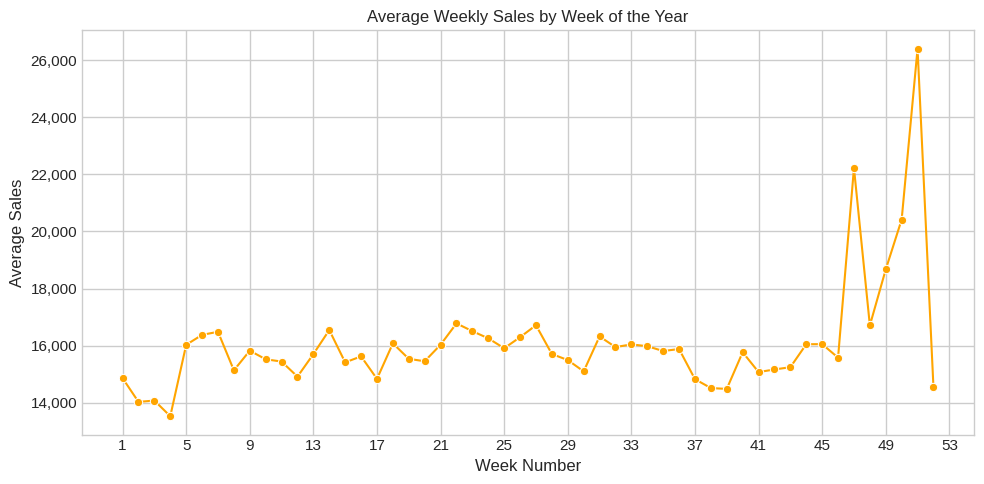

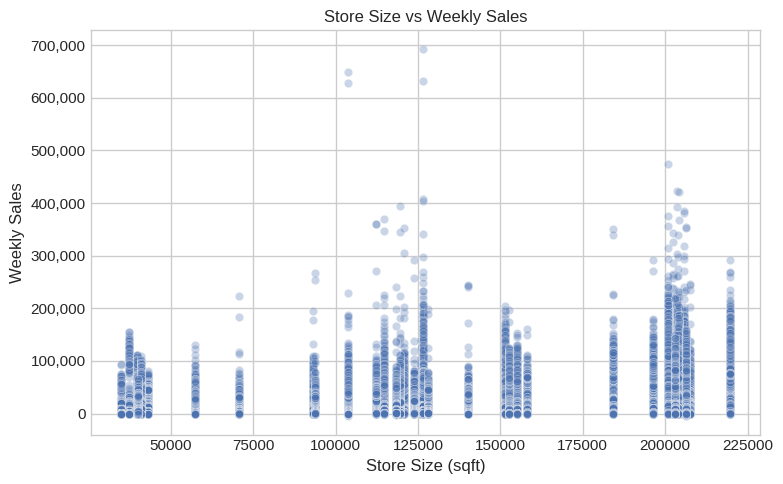

In [20]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GLOBAL SETTINGS
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib.ticker as ticker

# Function to apply thousands separator
def format_axis(ax):
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Load the merged dataset (assuming it's saved from the preprocessing step)
try:
    merged = pd.read_csv('walmart_preprocessed.csv')
    # Convert Date back to datetime if needed for plotting
    merged['Date'] = pd.to_datetime(merged['Date'])
except FileNotFoundError:
    print("Error: walmart_preprocessed.csv not found. Please run the preprocessing step first.")
    exit()


# 1. SALES DISTRIBUTION
plt.figure(figsize=(10, 5))
sns.histplot(merged['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales (All Stores)')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. AVERAGE SALES BY STORE TYPE
plt.figure(figsize=(6, 5))
# Calculate average sales for each type
avg_sales_type_A = merged[~(merged['Type_B'] | merged['Type_C'])]['Weekly_Sales'].mean()
avg_sales_type_B = merged[merged['Type_B']]['Weekly_Sales'].mean()
avg_sales_type_C = merged[merged['Type_C']]['Weekly_Sales'].mean()

# Create a new DataFrame for plotting
avg_sales_type_df = pd.DataFrame({
    'Type': ['A', 'B', 'C'],
    'Average Weekly Sales': [avg_sales_type_A, avg_sales_type_B, avg_sales_type_C]
})

sns.barplot(data=avg_sales_type_df, x='Type', y='Average Weekly Sales', palette='pastel', hue='Type', legend=False)
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
format_axis(plt.gca())
plt.tight_layout()
plt.show()


# 3. SALES OVER TIME
plt.figure(figsize=(12, 5))
merged_sorted = merged.sort_values('Date')
sns.lineplot(data=merged_sorted, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
format_axis(plt.gca())
plt.tight_layout()
plt.show()

# 4. SALES BY MONTH
plt.figure(figsize=(8, 5))
monthly_sales = merged.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', marker='o', color='green')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
format_axis(plt.gca())
plt.tight_layout()
plt.show()

# 5. SALES DURING HOLIDAYS VS NON-HOLIDAYS
plt.figure(figsize=(7, 5))
# Use 'IsHoliday_True' column
sns.boxplot(data=merged, x='IsHoliday_True', y='Weekly_Sales', palette='Set2', hue='IsHoliday_True', legend=False)
plt.title('Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
format_axis(plt.gca())
plt.tight_layout()
plt.show()

# 6. CORRELATION HEATMAP
plt.figure(figsize=(8, 6))
corr = merged[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_MarkDown']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 7. SALES BY DEPARTMENT (TOP 10)
plt.figure(figsize=(10, 5))
top_depts = merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_depts.index.astype(str), y=top_depts.values, palette='Blues_r', hue=top_depts.index.astype(str), legend=False)
plt.title('Top 10 Departments by Average Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Average Sales')
format_axis(plt.gca())
plt.tight_layout()
plt.show()

# 8. TOP 10 STORES BY AVERAGE SALES
plt.figure(figsize=(10, 5))
top_stores = merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_stores.index.astype(str), y=top_stores.values, palette='viridis')
plt.title('Top 10 Stores by Average Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
format_axis(plt.gca())
plt.tight_layout()
plt.show()

# 9. WEEKLY SALES TREND BY WEEK NUMBER (SEASONALITY)
plt.figure(figsize=(10, 5))
weekly_avg = merged.groupby('Week')['Weekly_Sales'].mean().reset_index()
sns.lineplot(data=weekly_avg, x='Week', y='Weekly_Sales', marker='o', color='orange')
plt.title('Average Weekly Sales by Week of the Year')
plt.xlabel('Week Number')
plt.ylabel('Average Sales')
plt.xticks(range(1, 54, 4))  # display every 4 weeks
format_axis(plt.gca())
plt.tight_layout()
plt.show()

# 10. SALES PERFORMANCE BY STORE SIZE
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='Size', y='Weekly_Sales', alpha=0.3)
plt.title('Store Size vs Weekly Sales')
plt.xlabel('Store Size (sqft)')
plt.ylabel('Weekly Sales')
format_axis(plt.gca())
plt.tight_layout()
plt.show()




#4.1 Baseline Model for Sales Prediction
#Linear Regression Baseline

In [19]:
# IMPORT REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# TRAIN A SIMPLE LINEAR REGRESSION MODEL
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# MAKE PREDICTIONS ON TEST SET
y_pred = baseline_model.predict(X_test)

# EVALUATE THE MODEL
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# PRINT EVALUATION RESULTS
print("Baseline Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")


Baseline Model Performance:
Mean Absolute Error (MAE): 11896.82
Root Mean Squared Error (RMSE): 18534.27
R-squared (R2 Score): 0.0515


#4.2 Aditional models
The baseline Linear Regression model provides a very limited fit to the data, capturing almost no predictive patterns. It highlights the need for more sophisticated models e.g., Random Forests and Gradient Boosting, these can better capture complex interactions and improve forecasting accuracy in subsequent phases.
#Random Forest Regressor and Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train Gradient Boosting
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Function to print metrics
def print_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}\n")

# Print results
print_metrics("Random Forest Regressor", y_test, rf_pred)
print_metrics("Gradient Boosting Regressor", y_test, gb_pred)


Random Forest Regressor Performance:
MAE: 4699.33
RMSE: 9639.78
R²: 0.7434

Gradient Boosting Regressor Performance:
MAE: 6775.90
RMSE: 10723.24
R²: 0.6825

